In [1]:
#Libraries Import
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_wine
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2,l1
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
from keras.optimizers import Adam

In [2]:
#Req1
#Data Loading and reading
df = pd.read_csv('winequality_white.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Checking if missing data and seeing the descrbtion
print(df.isnull().sum())
df.describe()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
#Splitting the data into target and features
x = df.drop('quality', axis = 1)
y = df['quality']
#Scaling the data and applying encoder
x = StandardScaler().fit_transform(x)
encoder = LabelBinarizer()
y_onehot = encoder.fit_transform(y)


# Verify the encoding
print("Original labels:", y.unique())
print("Encoded shape:", y_onehot.shape)

Original labels: [6 5 7 8 4 3 9]
Encoded shape: (4898, 7)


In [5]:
#data output size
output = len(y.unique())
output

7

In [6]:
#Splittinhg data into trian and test
(x_train, x_test, y_train, y_test) = train_test_split(x, y_onehot, test_size = 0.2, random_state = 42)
input_layer_dim = x_train.shape[1]

In [7]:
#Req2
#Model Creating
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (input_layer_dim,)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu' ),
    Dense(output, activation = 'softmax')
    ])
model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,103 (47.28 KB)

 Trainable params: 12,103 (47.28 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split=0.2,verbose=1)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4524 - loss: 1.5317 - val_accuracy: 0.5408 - val_loss: 1.1579
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5476 - loss: 1.1248 - val_accuracy: 0.5651 - val_loss: 1.1029
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5411 - loss: 1.1018 - val_accuracy: 0.5676 - val_loss: 1.0963
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5720 - loss: 1.0358 - val_accuracy: 0.5651 - val_loss: 1.0739
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5851 - loss: 1.0151 - val_accuracy: 0.5651 - val_loss: 1.0757
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5692 - loss: 1.0040 - val_accuracy: 0.5676 - val_loss: 1.0739
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5984 - loss: 0.9839 - val_accuracy: 0.5714 - val_loss: 1.0627
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5763 - loss: 0.9791 - val_accuracy: 0.5804 

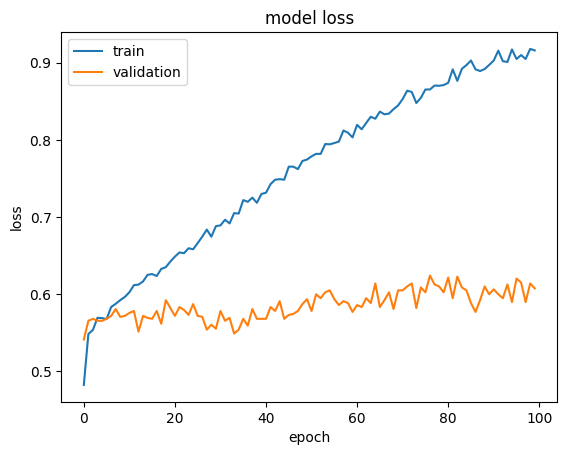

In [9]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
#Req4
#predicting and classifing the predction based on the max of 7 numbers
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_max = np.argmax(y_test, axis = 1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [11]:
#Computing The Scores
print("Accuracy Score: ", accuracy_score(y_test_max, y_pred))
print("Precision : ",precision_score(y_test_max, y_pred, average = 'weighted'))
print("Recall : ",recall_score(y_test_max, y_pred, average = 'weighted'))
print("F1 Score : ",f1_score(y_test_max, y_pred, average = 'weighted'))


Accuracy Score:  0.6295918367346939
Precision :  0.6304539483705439
Recall :  0.6295918367346939
F1 Score :  0.6291006667095773


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


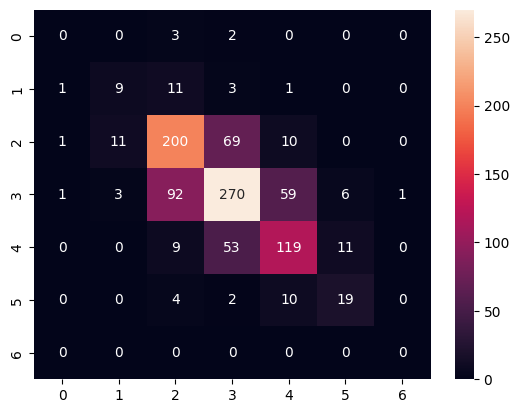

In [12]:
#Confusion Matrix using heatmaps
sns.heatmap(confusion_matrix(y_test_max, y_pred), annot = True, fmt = 'd')
plt.show()

In [15]:
#Req3
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

def objective(trial):
    # Hyperparameters to tune
    n_neurons = trial.suggest_int('n_neurons', 32, 128)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_float('learning_rate', 1e-6, 1, log=True)

    # Build model
    model = keras.Sequential([
        Dense(n_neurons, activation=activation, input_shape=(input_layer_dim,)),
        Dense(n_neurons, activation=activation),
        Dense(n_neurons, activation=activation),
        Dense(output, activation='softmax')  # 7 output classes
    ])

    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(x_train, y_onehot, validation_split=0.2,
                        batch_size=32, epochs=100, verbose=0)

    # Return best validation accuracy
    return max(history.history['val_accuracy'])


In [16]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

plot_optimization_history(study).show()
plot_param_importances(study).show()

[I 2025-04-20 20:00:42,555] A new study created in memory with name: no-name-2e84d5f0-d773-4e19-80eb-ef9c5bb76101
[I 2025-04-20 20:01:29,655] Trial 0 finished with value: 0.4693877696990967 and parameters: {'n_neurons': 74, 'activation': 'relu', 'learning_rate': 0.005051157918957795}. Best is trial 0 with value: 0.4693877696990967.
[I 2025-04-20 20:02:19,025] Trial 1 finished with value: 0.4553571343421936 and parameters: {'n_neurons': 125, 'activation': 'tanh', 'learning_rate': 5.374817673290236e-06}. Best is trial 0 with value: 0.4693877696990967.
[I 2025-04-20 20:03:02,245] Trial 2 finished with value: 0.46301019191741943 and parameters: {'n_neurons': 40, 'activation': 'tanh', 'learning_rate': 0.005087527786089593}. Best is trial 0 with value: 0.4693877696990967.
[I 2025-04-20 20:03:51,368] Trial 3 finished with value: 0.4464285671710968 and parameters: {'n_neurons': 103, 'activation': 'tanh', 'learning_rate': 2.7640245820446365e-05}. Best is trial 0 with value: 0.4693877696990967.


In [17]:
print("Best trial:")
trial = study.best_trial

print(f"  Accuracy: {trial.value}")
print("  Best hyperparameters: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Accuracy: 0.47066327929496765
  Best hyperparameters: 
    n_neurons: 61
    activation: tanh
    learning_rate: 0.006169339127633908
